In [38]:
# this allows you to upload zip-file with data
import os
from google.colab import files
files.upload()

Saving Co_tips-20180911T103544Z-001.zip to Co_tips-20180911T103544Z-001.zip


{'Co_tips-20180911T103544Z-001.zip': b'PK\x03\x04\x14\x00\x08\x08\x08\x00\x8a\x18+M\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x1e\x00\'\x00Co_tips/Big/A180814.114637.pngup#\x00\x01\xd1_\x11\xb4Co_tips/Big/A180814.114637.png\x00\x00\x80\xff\x7f\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x02\x00\x00\x02\x02\x08\x02\x00\x00\x002\'2\x9b\x00\x00\x00\x03sBIT\x08\x08\x08\xdb\xe1O\xe0\x00\x00 \x00IDATx\x9c\xec\x9d\xcd\x8e%\xb9q\xb6\x83\xcc\xac\xae\xea\x1e\xd9\x12\x0c\x0b^\x19\x06\xbc\xf7\xf5\xda\x97\xe6\xad\xe0\x8d\x05\xc1\x03{\xa4\xe9\xae\x9f\x93\xe4\xb7\x88\x89g\x1e2[W\xf0)\x17\x8d\xea\xaas2\xc9\xf8y\xe3\x8d`\x90\x19\xf1\xb7\xebo\xd7\xdf\xae\xbf]\x7f\xbb\xfe?\xbeZD\xfc\xfb\xbf\xff\xfbu]\x8f\xc7\xe3\xfd\xfd\xfd\xf1x\x8c1\xc6\x18s\xce1\xc6q\x1c\xbd\xf7\xde{\xfe\xd0\xea\xfa\xe5\xcb\xad\xcd9\xf3\xbf\xfeS~w\x8c\xc1\xcf\xad\xb5\xe38\xce\xf3<\x8e#\x7f\x99w\x8b\x88|\xf4u]\xd7u\xf1\xc5\xbc\xf2\xf7\x1en~\xab\xf7\xee\x9f\xf3>9\xce|h\xfer\xce\xf9\xf1\xf1\xf1\xf1\xf1\x91w\xe6\x8bs\xce\x88\x18c\

In [39]:
!unzip Co_tips-20180911T103544Z-001.zip -d data/

Archive:  Co_tips-20180911T103544Z-001.zip
  inflating: data/Co_tips/Big/A180814.114637.png  
  inflating: data/Co_tips/Big/A180814.115130.png  
  inflating: data/Co_tips/Big/A180816.154820.png  
  inflating: data/Co_tips/Big/A180814.121516.png  
  inflating: data/Co_tips/Big/A180814.120020.png  
  inflating: data/Co_tips/Big/A180815.164749.png  
  inflating: data/Co_tips/Big/A180814.161926.png  
  inflating: data/Co_tips/Small/A180815.180747.png  
  inflating: data/Co_tips/Small/A180809.171120.png  
  inflating: data/Co_tips/Small/A180810.091609.png  
  inflating: data/Co_tips/Small/A180809.162515.png  
  inflating: data/Co_tips/Small/A180814.113222.png  
  inflating: data/Co_tips/Small/A180815.160354.png  


In [36]:
!ls

bad.zip  crop  data  gdrive  sample_data


In [0]:
!rm -rf Co_tips-20180911T103544Z-001.zip

In [6]:
!mv -v data/Co_tips/Small/* data/


'data/Co_tips/Small/A180809.162515.png' -> 'data/A180809.162515.png'
'data/Co_tips/Small/A180809.171120.png' -> 'data/A180809.171120.png'
'data/Co_tips/Small/A180810.091609.png' -> 'data/A180810.091609.png'
'data/Co_tips/Small/A180814.113222.png' -> 'data/A180814.113222.png'
'data/Co_tips/Small/A180815.160354.png' -> 'data/A180815.160354.png'
'data/Co_tips/Small/A180815.180747.png' -> 'data/A180815.180747.png'


In [0]:
!rm -rf data/Co_tips

In [7]:
# we storage now only images with small scale tips (all of them are bad tips)
!ls data/

A180809.162515.png  A180810.091609.png	A180815.160354.png  Co_tips
A180809.171120.png  A180814.113222.png	A180815.180747.png


In [0]:
from PIL import Image

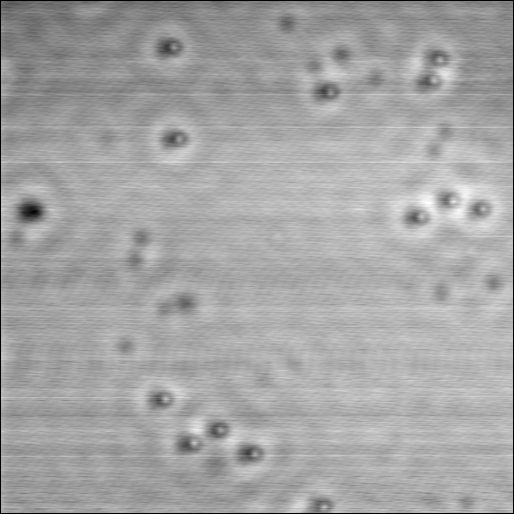

In [10]:
#look on one of the images. Further we will work out it's feautures
fname='A180815.180747'
img = Image.open('data/'+ fname+'.png'); img


In [11]:
# installing OpenCV libraries. Contrib module actually consist SURF
!pip install opencv-contrib-python==3.3.0.9

    100% |████████████████████████████████| 14.8MB 2.7MB/s 


In [0]:
import cv2 as cv


In [13]:
# basic opencv module. Also we need to install.
!pip install opencv-python==3.1.0.4

    100% |████████████████████████████████| 6.2MB 4.6MB/s 
  Found existing installation: opencv-python 3.4.3.18
    Uninstalling opencv-python-3.4.3.18:
      Successfully uninstalled opencv-python-3.4.3.18


In [14]:
# now we read the same image with opencv library for further futures detection
img = cv.imread('data/'+ fname+'.png',0)

# Create SURF object. You can specify params here or later.
# Here I set Hessian Threshold to 3000. If there are few feautures you could decrease it. If too many - increase this parameter.
surf = cv.xfeatures2d.SURF_create(3000)
# Find keypoints and descriptors directly
kp, des = surf.detectAndCompute(img,None)

#amount of feautures founded 
len(kp)

19

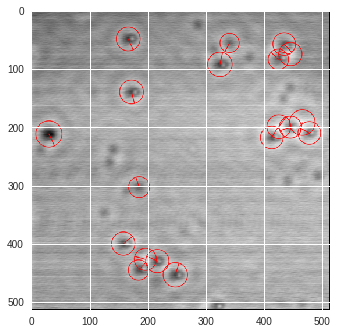

(<matplotlib.image.AxesImage at 0x7fa5050c7fd0>, None)

In [15]:
import matplotlib.pyplot as plt

img2 = cv.drawKeypoints(img,kp,None,(255,0,0),4)
plt.imshow(img2),plt.show()

In [0]:
#clear output folders
!rm -rf crop/bad
!rm -rf bad.zip

In [0]:
os.makedirs('crop/bad', exist_ok=True)

In [24]:

!ls  crop/bad

A180815.180747_0.png   A180815.180747_16.png  A180815.180747_5.png
A180815.180747_10.png  A180815.180747_17.png  A180815.180747_6.png
A180815.180747_11.png  A180815.180747_18.png  A180815.180747_7.png
A180815.180747_12.png  A180815.180747_1.png   A180815.180747_8.png
A180815.180747_13.png  A180815.180747_2.png   A180815.180747_9.png
A180815.180747_14.png  A180815.180747_3.png
A180815.180747_15.png  A180815.180747_4.png


In [0]:
# writing all features to separate files. 
# At first we should adjust radius according to feature size plus some gap 
img = Image.open('data/'+ fname+'.png')
i=0
zoom=2 #change this parameter to manage crop zoom
kp_coord=kp[i].pt
radius=kp[i].size/zoom
rect = (kp_coord[0]-radius,kp_coord[1]-radius,kp_coord[0]+radius,kp_coord[1]+radius )
img.crop(rect)
 

In [0]:
# writing all features to separate files. We should adjust radius according to feature size plus some gap
img = Image.open('data/'+ fname+'.png')   #again open the same image to crop it in cycle
for i in range(len(kp)):
    kp_coord=kp[i].pt  # cordinates of features centers
    radius=kp[i].size/2  # here we could adjust a crop size according to founded feature size - to make it penumbra visible and in same time not to small ball:))
    rect = (kp_coord[0]-radius,kp_coord[1]-radius,kp_coord[0]+radius,kp_coord[1]+radius )
    img.crop(rect).save('crop/bad/'+fname+'_'+str(i)+'.png')

In [34]:
!zip -r bad.zip crop/* #zip output folder with tip samples

  adding: crop/bad/ (stored 0%)
  adding: crop/bad/A180815.180747_0.png (stored 0%)
  adding: crop/bad/A180815.180747_17.png (stored 0%)
  adding: crop/bad/A180815.180747_2.png (stored 0%)
  adding: crop/bad/A180815.180747_7.png (stored 0%)
  adding: crop/bad/A180815.180747_16.png (stored 0%)
  adding: crop/bad/A180815.180747_11.png (stored 0%)
  adding: crop/bad/A180815.180747_6.png (stored 0%)
  adding: crop/bad/A180815.180747_13.png (stored 0%)
  adding: crop/bad/A180815.180747_3.png (stored 0%)
  adding: crop/bad/A180815.180747_10.png (stored 0%)
  adding: crop/bad/A180815.180747_4.png (stored 0%)
  adding: crop/bad/A180815.180747_5.png (stored 0%)
  adding: crop/bad/A180815.180747_1.png (stored 0%)
  adding: crop/bad/A180815.180747_9.png (stored 0%)
  adding: crop/bad/A180815.180747_18.png (stored 0%)
  adding: crop/bad/A180815.180747_8.png (stored 0%)
  adding: crop/bad/A180815.180747_14.png (stored 0%)
  adding: crop/bad/A180815.180747_12.png (stored 0%)
  adding: crop/bad/A1808

In [0]:
# download folder to your computer
from google.colab import files
files.download('bad.zip')

###  EXTRA part: show concrete feauture on image

In [25]:
kp[0].pt

(30.308794021606445, 210.8369903564453)

In [0]:
def getKey(item):
    return item.size

In [0]:
z=sorted(kp, key=getKey)

In [31]:
z[12].size

41.0

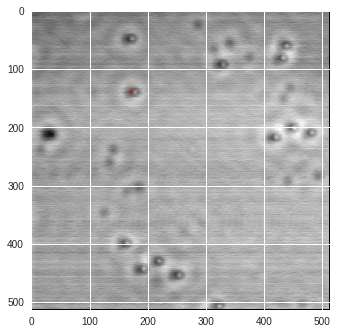

In [33]:
cur=z[12].pt
from skimage import io
import matplotlib.pyplot as plt
from matplotlib.patches import Arrow, Circle
cx, cy = cur[1],cur[0]

patches = [Circle((cy, cx), radius=2, color='red')]

fig, ax = plt.subplots(1)
ax.imshow(img)
for p in patches:
    ax.add_patch(p)
plt.show(fig)

In [40]:
!ls data/Co_tips/Big/

A180814.114637.png  A180814.120020.png	A180814.161926.png  A180816.154820.png
A180814.115130.png  A180814.121516.png	A180815.164749.png


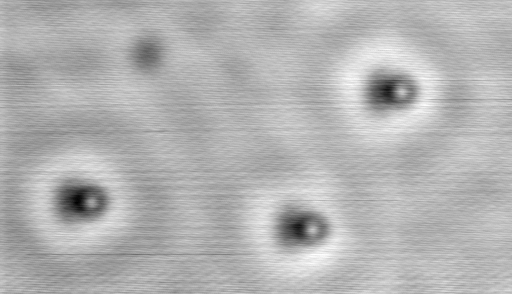

In [41]:
fname='A180814.161926'
img = Image.open('data/Co_tips/Big/'+ fname+'.png'); img

In [45]:
img = cv.imread('data/Co_tips/Big/'+ fname+'.png',0)

# Create SURF object. You can specify params here or later.
# Here I set Hessian Threshold to 400
surf = cv.xfeatures2d.SURF_create(8000)
# Find keypoints and descriptors directly
kp, des = surf.detectAndCompute(img,None)


len(kp)

3

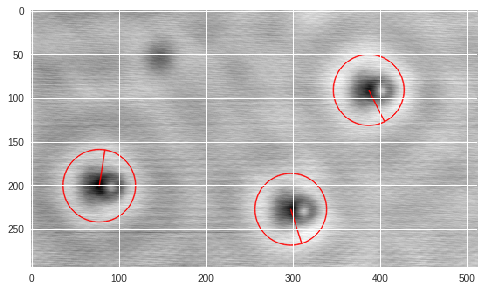

(<matplotlib.image.AxesImage at 0x7fa5021e49e8>, None)

In [46]:
import matplotlib.pyplot as plt

img2 = cv.drawKeypoints(img,kp,None,(255,0,0),4)
plt.imshow(img2),plt.show()

In [0]:
os.makedirs('crop/big_bad', exist_ok=True)

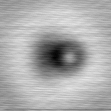

In [51]:
img = Image.open('data/Co_tips/Big/'+ fname+'.png')
i=0
zoom=1.5
kp_coord=kp[i].pt
radius=kp[i].size/zoom
rect = (kp_coord[0]-radius,kp_coord[1]-radius,kp_coord[0]+radius,kp_coord[1]+radius )
img.crop(rect)

In [0]:
img = Image.open('data/Co_tips/Big/'+ fname+'.png')
for i in range(len(kp)):
    kp_coord=kp[i].pt
    radius=kp[i].size/zoom
    rect = (kp_coord[0]-radius,kp_coord[1]-radius,kp_coord[0]+radius,kp_coord[1]+radius )
    img.crop(rect).save('crop/big_bad/'+fname+'_'+str(i)+'.png')

In [53]:
!ls crop/big_bad

A180814.161926_0.png  A180814.161926_1.png  A180814.161926_2.png


In [54]:
# for individual images of good tips
!zip -r big_good.zip crop/good/*

files.download('big_good.zip')

  adding: crop/big_bad/A180814.161926_0.png (stored 0%)
  adding: crop/big_bad/A180814.161926_1.png (stored 0%)
  adding: crop/big_bad/A180814.161926_2.png (stored 0%)


In [256]:
# for individual images of bad tips
!zip -r big_bad.zip crop/big_bad/*

files.download('big_bad.zip')

  adding: crop/big_bad/A180815.164749_0.png (deflated 0%)
  adding: crop/big_bad/A180816.154820_0.png (deflated 0%)
